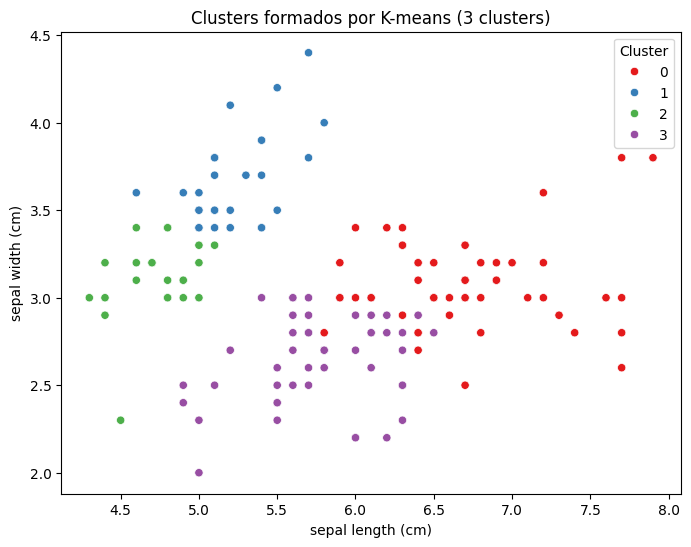

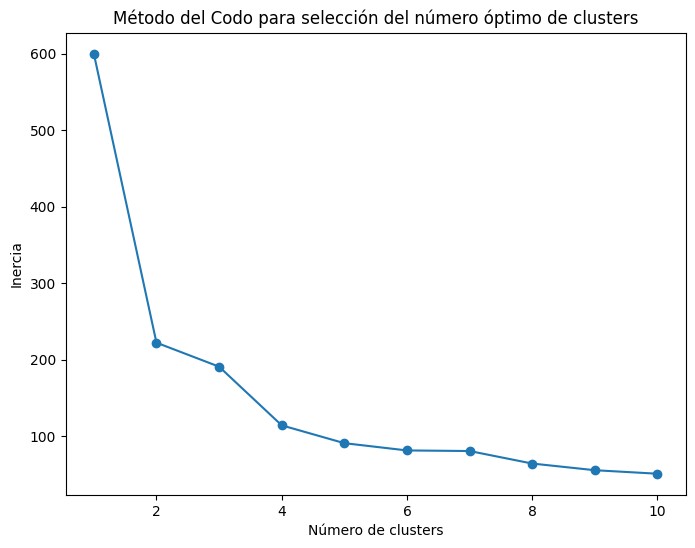

In [2]:

# Importación de librerías necesarias y carga de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Carga del dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

# Normalización de los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplicación de K-means con 3 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Etiquetas de los clusters
clusters = kmeans.labels_

# Añadimos los clusters a nuestro DataFrame original
data['Cluster'] = clusters
data.head()

# Visualización de los clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['sepal length (cm)'], y=data['sepal width (cm)'], hue=data['Cluster'], palette='Set1')
plt.title("Clusters formados por K-means (3 clusters)")
plt.show()

# Determinación del número óptimo de clusters con el Método del Codo
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Gráfica del Método del Codo
plt.figure(figsize=(8,6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para selección del número óptimo de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()